<a href="https://colab.research.google.com/github/edwardauron/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/Linear_Regression_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Import everything you could ever need. ;)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [0]:
# Ukraine Used Car Sale Price Prediction
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.head()

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
0,23,15500.0,0,68,2.5,1,1,2010,1
1,50,20500.0,3,173,1.8,1,1,2011,2
2,50,35000.0,2,135,5.5,3,1,2008,2
3,50,17800.0,5,162,1.8,0,1,2012,0
4,55,16600.0,0,83,2.0,3,1,2013,1


# Model lead me to believe outliers were heavily affecting the year coeffecient, so i came back and removed them for both year and mileage.

In [0]:
df = df[((df.year - df.year.mean()) / df.year.std()).abs() < 3]
df = df[((df.mileage - df.mileage.mean()) / df.mileage.std()).abs() < 3]

In [0]:
df.shape

(8326, 9)

In [0]:
df.isna().sum()

make            0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
drive           0
dtype: int64

# Predictive Modeling with Linear Regression

## 1.1 Divide the dataset features into an X matrix and y vector ("price" is what we want to predict).

In [0]:
X = df.drop(['price'], axis=1)
y = df['price']

## 1.2 Split the data into test and train datasets using train_test_split

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.30, random_state=42)

## 1.3 Use Scikit-Learn to fit a multiple regression model using your training data.

In [0]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
columns = X.columns.unique().tolist()

## 1.4 Report the Intercept and Coefficient Values for the fitted model

In [0]:
print("coefficients: \n", columns[0],model.coef_[0],'\n', 
      columns[1],model.coef_[1],'\n', 
      columns[2],model.coef_[2],'\n', 
      columns[3],model.coef_[3],'\n',
      columns[4],model.coef_[4],'\n', 
      columns[5],model.coef_[5],'\n', 
      columns[6],model.coef_[6],'\n',
      columns[7],model.coef_[7],'\n',)
print("intercepts: ", model.intercept_)

coefficients: 
 make -43.08100340418052 
 body -1724.1105836151473 
 mileage -51.35744101479031 
 engV 335.8491462360398 
 engType -1318.714597069526 
 registration 3576.512105885882 
 year 1203.8383165461403 
 drive 8301.206780293178 

intercepts:  -2393215.2176582105


# Note:

We should have a model with a constant here as our baseline for price, we have no interest in the price of a car that has 0 as the value for all of it's features.

The intercept acts as the constant, but this is detrimental, because its -2,263, 470.

## 1.5 Use the test data to make predictions

In [0]:
y_pred = model.predict(X_test)

## 1.6 Calculate and report both the Root-Mean-Square error and $R^2$ for the model. 

In [0]:
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)

print('RMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

RMSE is 18728.493853447377
R^2 is 0.3228565433009254


## 1.7 How should we interpret the coefficient corresponding to the "year" feature?

# Coeffecients: Simple

The size of the coefficient for each independent variable gives you the size of the effect that variable is having on your dependent variable, and the sign on the coefficient (positive or negative) gives you the direction of the effect.

1. It has a greater effect on price than make, body, mileage, slightly bigger effect than engV.

2. Because it's positive we expect the price to increase as the year of the car increases, meaning newer vehicles correspond with a higher price.



## 1.8 How should we interpret the Root-Mean-Square Error?

#RMSE: Simple

RMSE can be explained as the standard deviation of the unexplained variance. The lower of a value of RMSE, the better indication of a fighting model.

RMSE is a good measure of model accuracy if our objection is to predict our target given our features.

Given that the unexplained variance of price is near 20k, i'd say this model currently performs quite terribly. We're failing to account for what the most important features are, and we need to check for data skew/outliers/etc to ensure we're doing a more precise analysis.

## 1.9 How should we interpret the $R^2$?

#On $R^2$:

For multiple regression models R-squared is calculated with pairwise correlations among all the variables, including correlations of the independent variables with each other as well as with the dependent variable.

We can only explain 30% of the variance of our data!  Or put another way, we can say the variance of its errors is 30% less than the variance of the dependent variable.

That's awful! We also can explain only somewhere between 13% and 29% of the standard deviation. No beuno. This model really needs some help.

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [0]:
df['log_price'] = np.log(df['price'])

## 2.2 Use scatterplots or seaborn's pairplot function to do the "eyeball test" for non-linearly distributed features.

The eyeball test works here, because we have many ordinal variables, and two very obvious polynomial candidates, that is, the line of best fit has curvature.


I would have liked to have done a test for heteroscedasticity on the make! For the sake of the assignment, I chose not to. Real world I would.

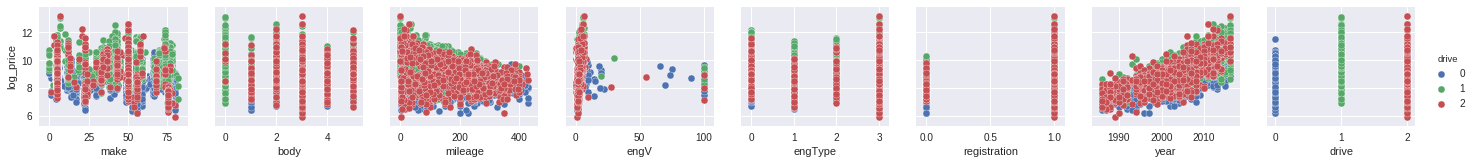

In [0]:
x_columns = df.columns.drop(['price', 'log_price'])
sns.pairplot(df, x_vars=x_columns, y_vars=['log_price'], hue='drive')

## 2.3 If appropriate, create any polynomial features. 

It looks to me like mileage and especially year are good candidates for polynomial features. I want those outliers in mileage gone, but i can wait :)

In [0]:
df['mileage_squared'] = df['mileage']**2
df['year_squared'] = df['year']**2

## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [0]:
X = df.drop(['price', 'log_price'], axis=1)
y = df['log_price']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.30, random_state=42)
model = LinearRegression()
model.fit(X_train, Y_train)
y_pred = model.predict(X_test)
RMSE = (np.sqrt(mean_squared_error(Y_test, y_pred)))
R2 = r2_score(Y_test, y_pred)




In [0]:
columns = X.columns.unique().tolist()

In [0]:
print("coefficients: \n", columns[0],model.coef_[0],'\n', 
      columns[1],model.coef_[1],'\n', 
      columns[2],model.coef_[2],'\n', 
      columns[3],model.coef_[3],'\n',
      columns[4],model.coef_[4],'\n', 
      columns[5],model.coef_[5],'\n', 
      columns[6],model.coef_[6],'\n',
      columns[7],model.coef_[7],'\n',
      columns[8],model.coef_[8],'\n', 
      columns[9],model.coef_[9],'\n')
print("intercepts: ", model.intercept_)
print('\nRMSE is {}'.format(RMSE))
print('R^2 is {}'.format(R2))

coefficients: 
 make -0.0014998424887387835 
 body -0.0922467792665972 
 mileage -0.0006406222292716726 
 engV 0.011728604368896348 
 engType -0.04745424551063527 
 registration 0.678160129672719 
 year -6.18301535054273 
 drive 0.38046069352850537 
 mileage_squared 4.0140727086690475e-06 
 year_squared 0.0015697350882998354 

intercepts:  6094.963171546157

RMSE is 0.5577717932664691
R^2 is 0.6465572213853327


## 2.5 How might we interpret the coefficient on "year" in this new regression model?

# Extra Extra read all about it: People like new things!

Year is now the most significant contributer to the price of a car. And the indication is that the older the car is the lower the price of the car will be. In fact, the scale of the coeffecient compared to the others indicates it'll be a drastic change.


# Gradient Descent

## 3.1 What does Gradient Descent seek to minimize?

1. It seeks to find the minimum of a function. It depends on it's application. If we use it for n-dimensional space, the point is always to head towards the minimum. For our example we want to minimize the cost function. The higher the dimensonality, the greater your matrix will be when using a sum of error, typically SSE.

2. It's an iterative process that starts with specified weights, it calculates the error, let's say SSE, and then it calculates the gradient, or the change in SSE when the weights are changed marginally. 

3. Given the gradient we just calculated, adjust the weights so that the we achieve optimal values of the minimum of our error, again in this example SSE.

4. It now uses the new weights for the next prediction of the independent variables of our function and continues to repeat this process until adjust the weights fails to reduce error. (well significantly >.<)

It's computationally much more effecient, as well as actually understandable (and depending on dimensionality, even possible )for humans to undertake.



## 3.2 What is the "Learning Rate" and what is its function?

The learning rate is the size of the adjustments of our weights. A small learning rate means small adjustmens, and small adjustments mean that we can expect a more precise movement towards the local minumum, and because we know we're moving towards a set point given our function, this allows us to expect accuracy. 

You might use a high learning rate to begin with to get a feel for how large of an adjustment you can make without creating a large variance in error calculation, and reduce as needed.

# Model Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [0]:
X = df.drop(['price', 'log_price'], axis=1)
y = df['log_price']

# add constant for variance calculation
X = sm.add_constant(X)

model = sm.OLS(y, X).fit(cov_type='HC3')
predictions = model.predict(X)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     1717.
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        18:08:45   Log-Likelihood:                -6694.4
No. Observations:                8326   AIC:                         1.341e+04
Df Residuals:                    8315   BIC:                         1.349e+04
Df Model:                          10                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            6076.5228    658.329     

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. Do we have multicollinearity problems?

In [0]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [0]:
columns.insert(0, 'constant')

In [0]:
print("Variance Inflation Factors: \n", 
      columns[0],vif[0],'\n', 
      columns[1],vif[1],'\n', 
      columns[2],vif[2],'\n', 
      columns[3],vif[3],'\n',
      columns[4],vif[4],'\n', 
      columns[5],vif[5],'\n', 
      columns[6],vif[6],'\n',
      columns[7],vif[7],'\n',
      columns[8],vif[8],'\n', 
      columns[9],vif[9],'\n',
      columns[10],vif[10])

Variance Inflation Factors: 
 constant 9307246259.659908 
 make 1.062153803876568 
 body 1.1770254847582378 
 mileage 15.378682502795684 
 engV 1.0092475690398628 
 engType 1.1801181616352372 
 registration 1.1200753549448776 
 year 358037.2145108427 
 drive 1.1354800494904929 
 mileage_squared 12.392822197647993 
 year_squared 358547.052348688


We have multicolinearity, but that might be because we have failed to do something important. We have not scaled our data appropriately, and we have not removed outliers.

I'll use scikitlearn's robust scaler as it is quite adept at working with outliers.

In [0]:
X = df.drop(['price', 'log_price'], axis=1)
y = df['log_price']


In [0]:
X = sm.add_constant(X)

model = sm.OLS(y, X).fit(cov_type='HC3')
predictions = model.predict(X)

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     1717.
Date:                Fri, 18 Jan 2019   Prob (F-statistic):               0.00
Time:                        18:09:46   Log-Likelihood:                -6694.4
No. Observations:                8326   AIC:                         1.341e+04
Df Residuals:                    8315   BIC:                         1.349e+04
Df Model:                          10                                         
Covariance Type:                  HC3                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            6076.5228    658.329     

In [0]:
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [0]:
print("Variance Inflation Factors: \n", 
      columns[0],vif[0],'\n', 
      columns[1],vif[1],'\n', 
      columns[2],vif[2],'\n', 
      columns[3],vif[3],'\n',
      columns[4],vif[4],'\n', 
      columns[5],vif[5],'\n', 
      columns[6],vif[6],'\n',
      columns[7],vif[7],'\n',
      columns[8],vif[8],'\n', 
      columns[9],vif[9],'\n',
      columns[10],vif[10])

Variance Inflation Factors: 
 constant 9307246259.659908 
 make 1.062153803876568 
 body 1.1770254847582378 
 mileage 15.378682502795684 
 engV 1.0092475690398628 
 engType 1.1801181616352372 
 registration 1.1200753549448776 
 year 358037.2145108427 
 drive 1.1354800494904929 
 mileage_squared 12.392822197647993 
 year_squared 358547.052348688


# Well.

 Extremely unreliable. But why? Is it due to outliers? Looking back at my pairplots, there are several outliers on the left hand side of the year data.

I went back at this point and tried to get rid of them.

Just finished removing outliers for the two specified columns, and while it did reduce the collinearity of year, it still has a very high variance inflation factor, which means the coeffecient is not reliable. The year intuitively seems very important to price, but I'm not sure it's an accurate prediction of price in this case. There must be something we're missing, or have overlooked. Maybe if we split the data into each make having it's own unique independent variable. I also wonder if some of the features were removed on purpose? Or if the collection of data from the source was more minimal. There are so many more independent variables we're missing, our problem could be that we simply don't have enough data.

I want to explore this more, rather than just dropping the unreliable coeffecient, but for the sake of time, it'll have to wait.